**Author**: Debojit Gogoi.

**EMail**: debojitgogoi.blr@gmail.com

**Dataset**: Limited access

**Business problem definition**:

The company wants to understand and process the data coming out of data engineering pipelines:

* Clean, sanitize and manipulate data to get useful features out of raw fields
* Make sense out of the raw data and help the data science team to build forecasting models on it

This document contains

* Introduction: Problem Statement
* Dataset preparation: Observations on dataset
* EDA
* Hypothesis Testing & Visual Analysis
* Handling categories and categorical values
* Business Insights
* Recommendations


About:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

1. Introduction: Problem Statement

**1.1 Business problem:**

Delhivery's data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines

**1.2 Expectations and Objectives:**

* Clean, sanitize and manipulate data to get useful features out of raw fields
* Make sense out of the raw data and help the data science team to build forecasting models on it

**1.3 Dataset Overview:**

Dataset preparation: Observatons on the dataset

  * Load the dataset.
  * Understand the structure of the dataset, including column names and data types.
  * Check for missing values and handle them appropriately.
  * List item

In [85]:
# import the required libraries for our exploration
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [86]:
# import the dataset
!wget '/delhivery_data.csv' -O delhivery_data.csv

--2024-10-14 14:46:29--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.234.72, 65.8.234.174, 65.8.234.36, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.234.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   154MB/s    in 0.3s    

2024-10-14 14:46:29 (154 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [87]:
delhivery_data = pd.read_csv("delhivery_data.csv")
delhivery_data.info(), delhivery_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

(None,
        data          trip_creation_time  \
 0  training  2018-09-20 02:35:36.476840   
 1  training  2018-09-20 02:35:36.476840   
 2  training  2018-09-20 02:35:36.476840   
 3  training  2018-09-20 02:35:36.476840   
 4  training  2018-09-20 02:35:36.476840   
 
                                  route_schedule_uuid route_type  \
 0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
 1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
 2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
 3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
 4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
 
                  trip_uuid source_center                 source_name  \
 0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
 1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
 2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
 3  trip-1537410936476493

In [88]:
print(delhivery_data.dtypes)
print(delhivery_data.isnull().sum())

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

**Observations:**

**Initial Structure and Overview of the Dataset**

The dataset contains **144,867** entries and **24** columns. Key observations:

* **Categorical fields**: data, route_type, trip_uuid, source_center,
destination_center, etc.
* **Timestamp fields**: trip_creation_time, od_start_time, od_end_time, cutoff_timestamp.
* **Numeric fields**: actual_distance_to_destination, actual_time, osrm_time, osrm_distance, etc.
* **Missing Data**: Columns source_name and destination_name have some missing values.

In [89]:
# clean missing values
missing_values = delhivery_data.isnull().sum()
summary_stats = delhivery_data.describe(include='all')
missing_values, summary_stats

(data                                0
 trip_creation_time                  0
 route_schedule_uuid                 0
 route_type                          0
 trip_uuid                           0
 source_center                       0
 source_name                       293
 destination_center                  0
 destination_name                  261
 od_start_time                       0
 od_end_time                         0
 start_scan_to_end_scan              0
 is_cutoff                           0
 cutoff_factor                       0
 cutoff_timestamp                    0
 actual_distance_to_destination      0
 actual_time                         0
 osrm_time                           0
 osrm_distance                       0
 factor                              0
 segment_actual_time                 0
 segment_osrm_time                   0
 segment_osrm_distance               0
 segment_factor                      0
 dtype: int64,
             data          trip_creation_time  \


In [90]:
# missing values imputation with mode
delhivery_data['source_name'].fillna(delhivery_data['source_name'].mode()[0], inplace=True)
delhivery_data['destination_name'].fillna(delhivery_data['destination_name'].mode()[0], inplace=True)
time_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
delhivery_data[time_columns] = delhivery_data[time_columns].apply(pd.to_datetime, format='mixed')
missing_values_after = delhivery_data.isnull().sum()
delhivery_data[time_columns].dtypes, missing_values_after

(trip_creation_time    datetime64[ns]
 od_start_time         datetime64[ns]
 od_end_time           datetime64[ns]
 cutoff_timestamp      datetime64[ns]
 dtype: object,
 data                              0
 trip_creation_time                0
 route_schedule_uuid               0
 route_type                        0
 trip_uuid                         0
 source_center                     0
 source_name                       0
 destination_center                0
 destination_name                  0
 od_start_time                     0
 od_end_time                       0
 start_scan_to_end_scan            0
 is_cutoff                         0
 cutoff_factor                     0
 cutoff_timestamp                  0
 actual_distance_to_destination    0
 actual_time                       0
 osrm_time                         0
 osrm_distance                     0
 factor                            0
 segment_actual_time               0
 segment_osrm_time                 0
 segment_osrm_dist

**Observations**

* Missing values have been successfully handled for source_name and destination_name.
* Time columns (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp) have been converted to datetime format.

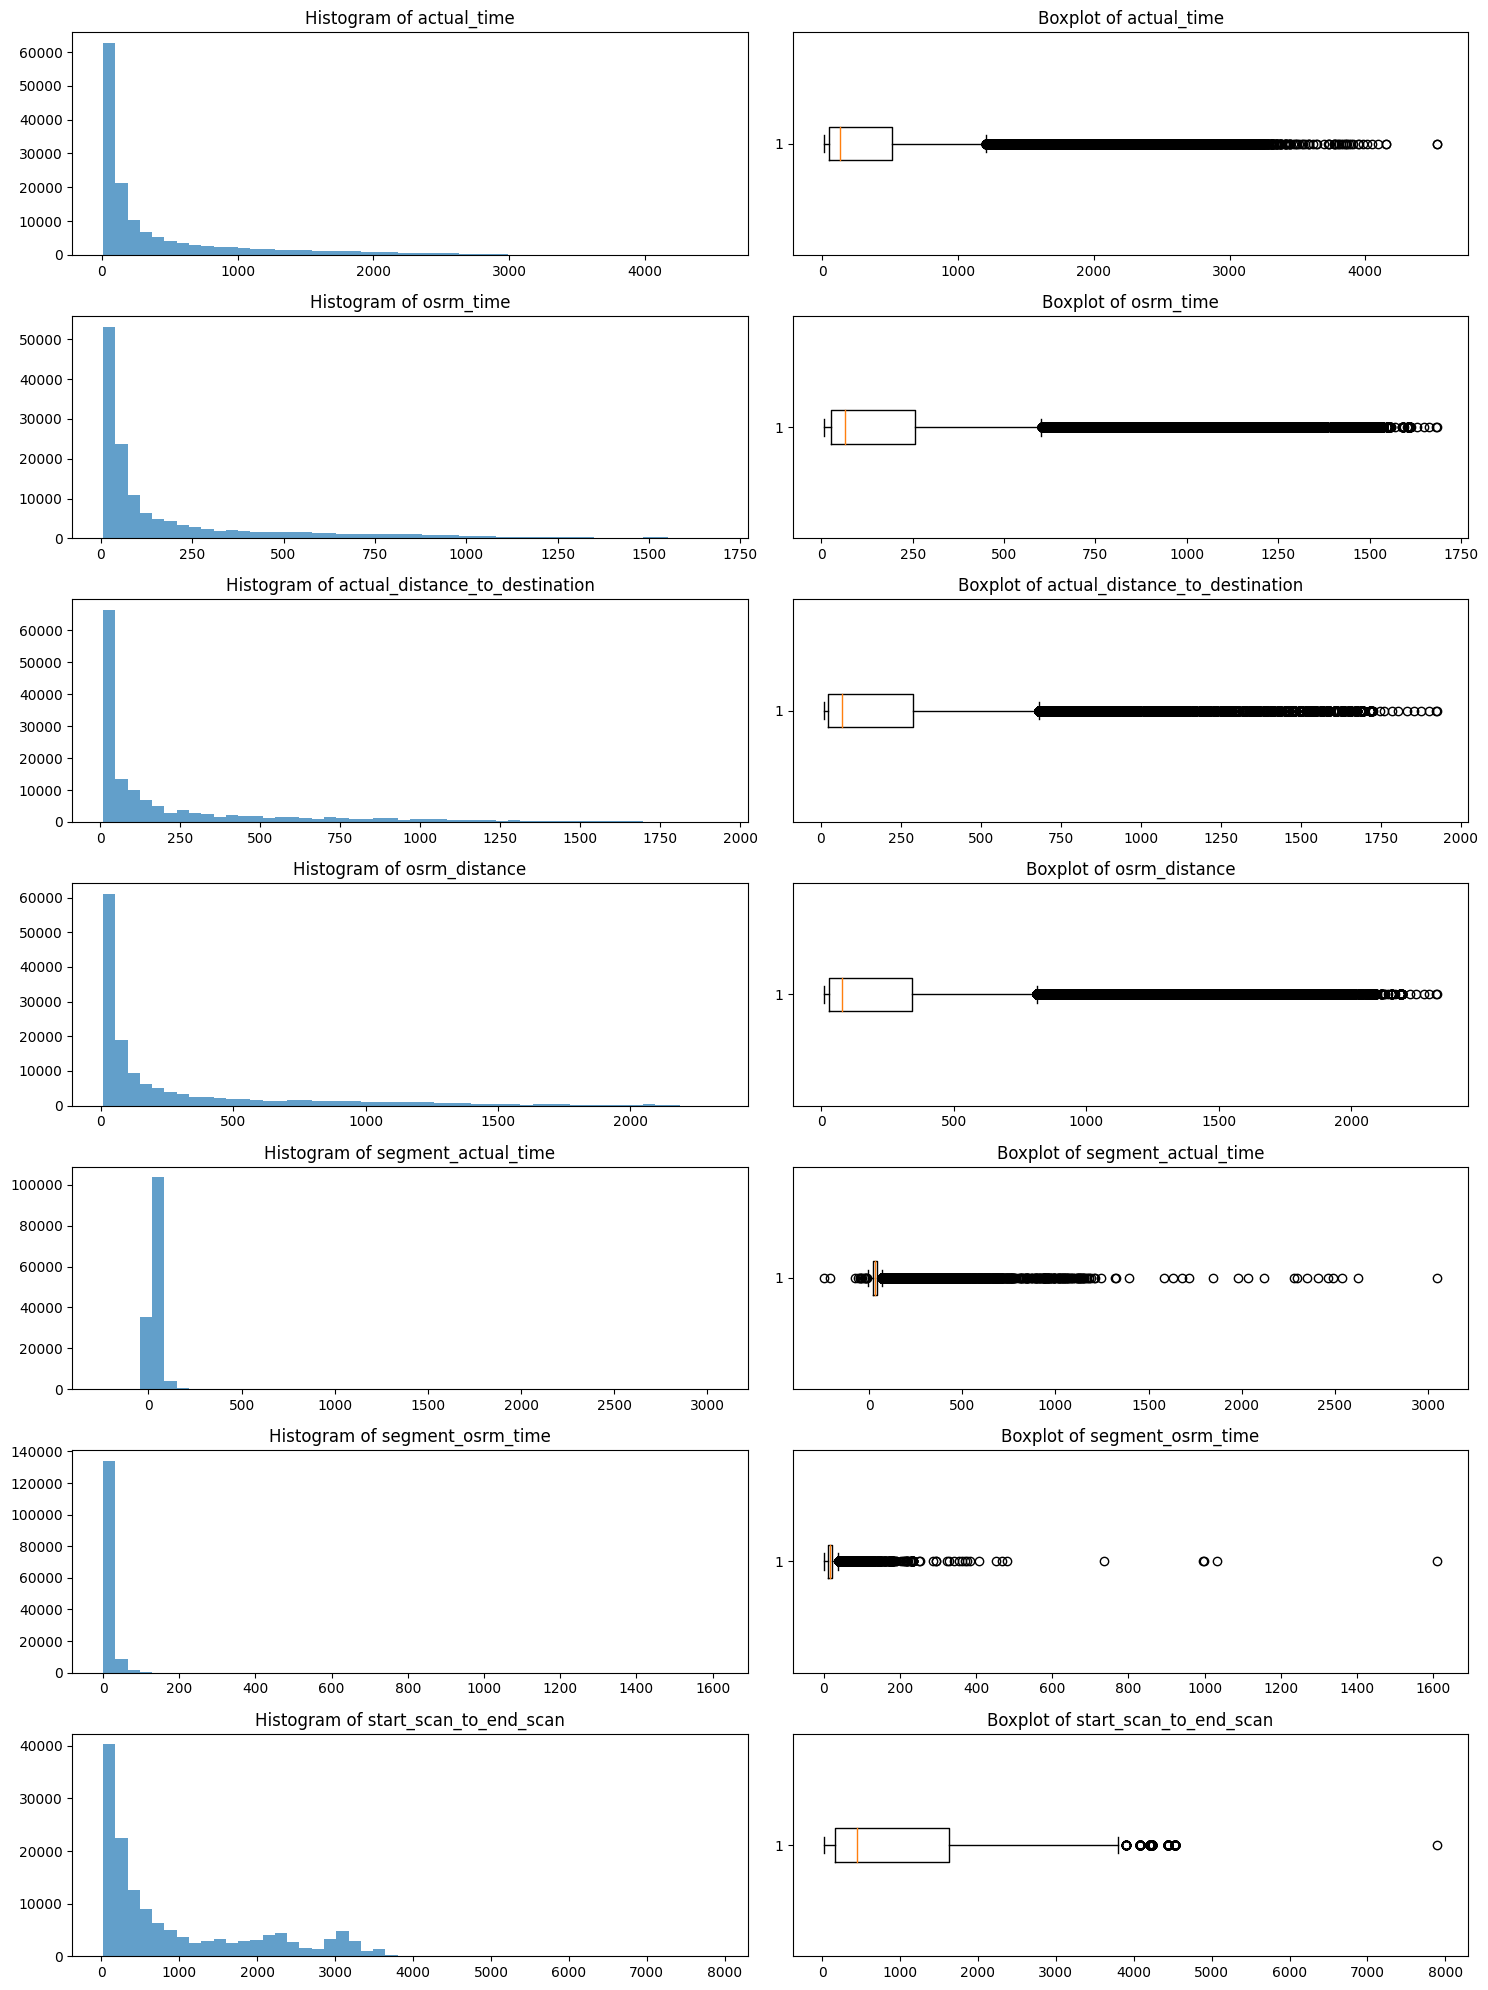

In [67]:
# visualizations
import matplotlib.pyplot as plt

numeric_columns = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance',
                   'segment_actual_time', 'segment_osrm_time', 'start_scan_to_end_scan']
plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(7, 2, 2*i-1)
    plt.hist(delhivery_data[column], bins=50, alpha=0.7)
    plt.title(f'Histogram of {column}')

    plt.subplot(7, 2, 2*i)
    plt.boxplot(delhivery_data[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


**Observations:**

**Histograms:**

* Most numeric variables, such as actual_time, osrm_time, and segment_actual_time, display right-skewed distributions, indicating a concentration of shorter times but with a long tail of longer durations.
* Variables like actual_distance_to_destination and osrm_distance also show a similar skew, with the majority of deliveries covering shorter distances, but some spanning significantly longer ranges.


**Boxplots:**
* There are noticeable outliers in almost all numeric variables, particularly in actual_time, segment_actual_time, and osrm_time, which suggests that some trips take much longer than others.

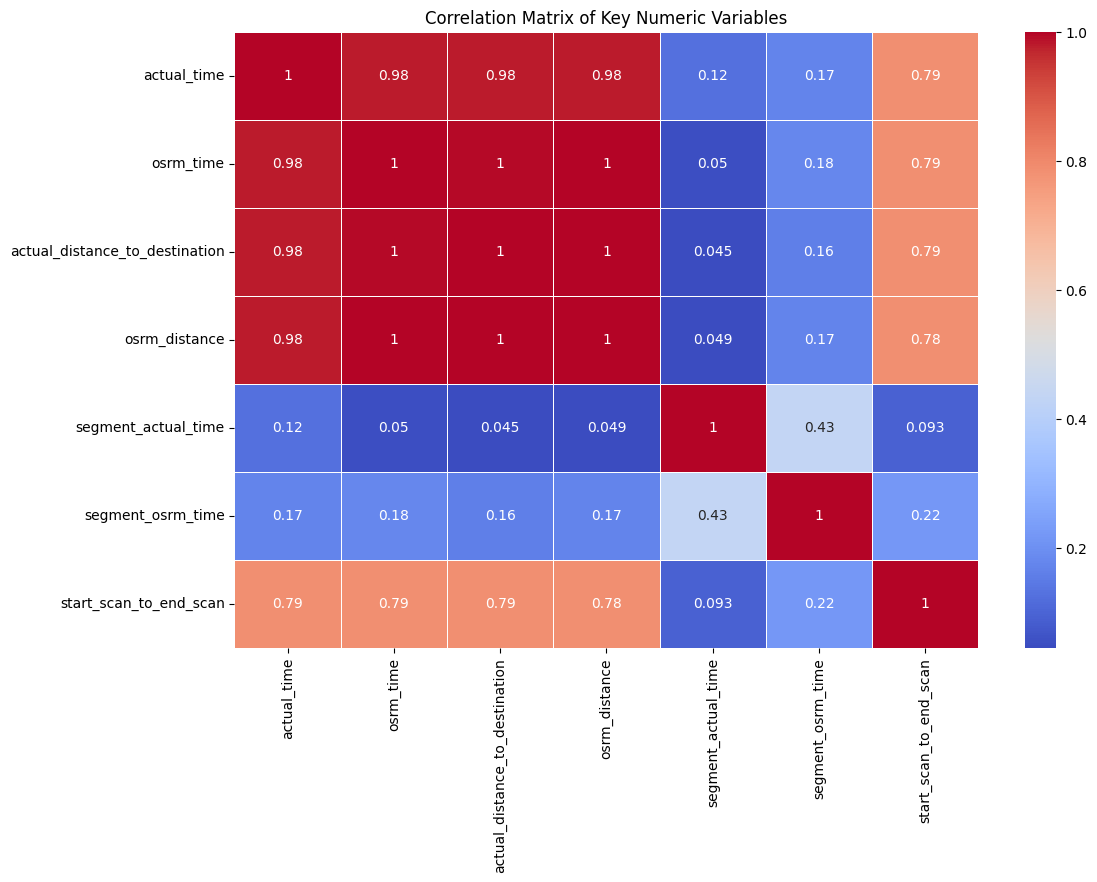

In [68]:
# correlation
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = delhivery_data[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Numeric Variables')
plt.show()


**Observations:**

**Strong Positive Correlations:**

* actual_time and osrm_time show a strong positive correlation (close to 1), indicating that as the OSRM calculated time increases, the actual time also increases proportionally.
* actual_distance_to_destination and osrm_distance are similarly strongly correlated, reflecting that longer actual distances align closely with OSRM-calculated distances.


**Segment Data:**

* segment_actual_time and segment_osrm_time also exhibit a positive correlation, but it's weaker compared to the overall time correlation.

**Insights:**

* These strong correlations suggest that the OSRM routing engine does provide a reasonable estimate of delivery times and distances.
* The presence of outliers may need further investigation.

In [69]:
# outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_dict = {col: detect_outliers_iqr(delhivery_data, col) for col in numeric_columns}
outlier_counts = {col: len(outliers_dict[col]) for col in numeric_columns}
outlier_counts


{'actual_time': 16633,
 'osrm_time': 17603,
 'actual_distance_to_destination': 17992,
 'osrm_distance': 17816,
 'segment_actual_time': 9298,
 'segment_osrm_time': 6378,
 'start_scan_to_end_scan': 373}

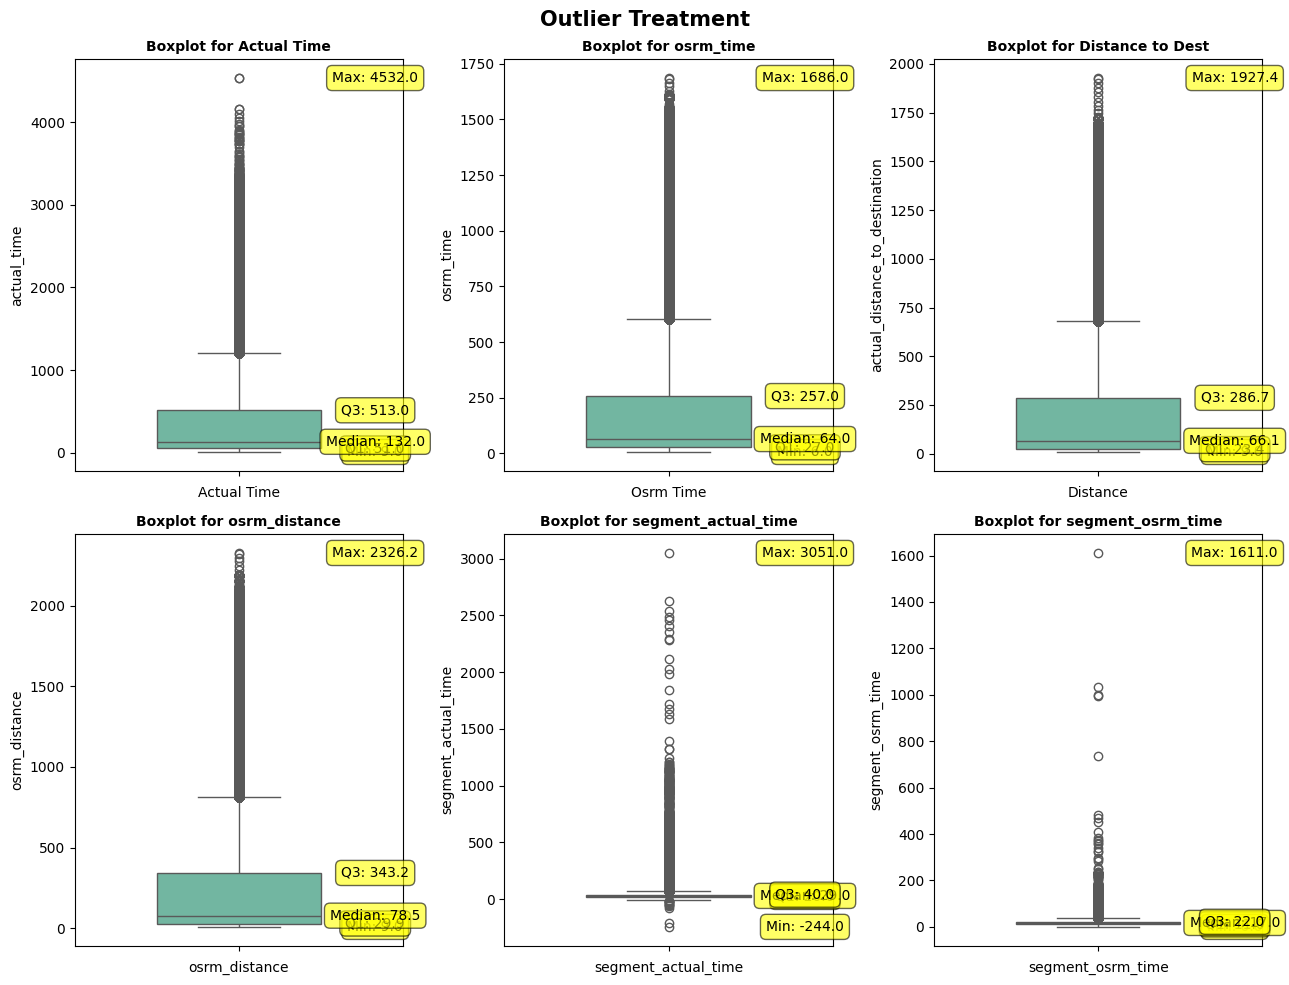

In [70]:
# create figure and subplots manually
numeric_columns = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance',
                   'segment_actual_time', 'segment_osrm_time', 'start_scan_to_end_scan']
fig = plt.figure(figsize=(13, 10))
fig.suptitle('Outlier Treatment', fontsize=15, fontweight='bold')

# function to annotate boxplot with statistical values
def annotate_boxplot(ax, data):
    min_val = data.min()
    max_val = data.max()
    median_val = data.median()
    q1_val = data.quantile(0.25)
    q3_val = data.quantile(0.75)

    # annotations
    for val, label in zip([min_val, q1_val, median_val, q3_val, max_val], ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        ax.annotate(text=f"{label}: {val:.1f}", xy=(0.5, val), xytext=(-20, 0), textcoords='offset points',
                    ha='center', va='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.4', fc='yellow', alpha=0.6))

# boxplot for delhivery_data actual time
ax1 = fig.add_subplot(231) # plot 1
color_palette = sns.color_palette("Set2")
sns.boxplot(y=delhivery_data['actual_time'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax1)
ax1.set_title('Boxplot for Actual Time', fontsize=10, fontweight='bold')
ax1.set_xlabel('Actual Time', fontsize=10)
annotate_boxplot(ax1, delhivery_data['actual_time']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for osrm_time
ax2 = fig.add_subplot(232) # plot 2
sns.boxplot(y=delhivery_data['osrm_time'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax2)
ax2.set_title('Boxplot for osrm_time', fontsize=10, fontweight='bold')
ax2.set_xlabel('Osrm Time', fontsize=10)
annotate_boxplot(ax2, delhivery_data['osrm_time']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for actual_distance_to_destination
ax3 = fig.add_subplot(233) # plot 2
sns.boxplot(y=delhivery_data['actual_distance_to_destination'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax3)
ax3.set_title('Boxplot for Distance to Dest', fontsize=10, fontweight='bold')
ax3.set_xlabel('Distance', fontsize=10)
annotate_boxplot(ax3, delhivery_data['actual_distance_to_destination']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for osrm_distance
ax4 = fig.add_subplot(234) # plot 2
sns.boxplot(y=delhivery_data['osrm_distance'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax4)
ax4.set_title('Boxplot for osrm_distance', fontsize=10, fontweight='bold')
ax4.set_xlabel('osrm_distance', fontsize=10)
annotate_boxplot(ax4, delhivery_data['osrm_distance']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for segment_actual_time
ax5 = fig.add_subplot(235) # plot 2
sns.boxplot(y=delhivery_data['segment_actual_time'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax5)
ax5.set_title('Boxplot for segment_actual_time', fontsize=10, fontweight='bold')
ax5.set_xlabel('segment_actual_time', fontsize=10)
annotate_boxplot(ax5, delhivery_data['segment_actual_time']) # add annotations for min, Q1, median, Q3, and max to the boxplot

# boxplot for segment_osrm_time
ax6 = fig.add_subplot(236) # plot 2
sns.boxplot(y=delhivery_data['segment_osrm_time'], data=delhivery_data, width=0.5, palette=color_palette, ax=ax6)
ax6.set_title('Boxplot for segment_osrm_time', fontsize=10, fontweight='bold')
ax6.set_xlabel('segment_osrm_time', fontsize=10)
annotate_boxplot(ax6, delhivery_data['segment_osrm_time']) # add annotations for min, Q1, median, Q3, and max to the boxplot

#adjusting layout for a better fit
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

**Observations**

Significant numbers of outliers were detected across key variables:

* actual_time: 16,633 outliers
* osrm_time: 17,603 outliers
* actual_distance_to_destination: 17,992 outliers
* segment_actual_time: 9,298 outliers
* segment_osrm_time: 6,378 outliers
* start_scan_to_end_scan: 373 outliers

In [71]:
# cap outliers

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

for col in numeric_columns:
    cap_outliers_iqr(delhivery_data, col)

capped_summary_stats = delhivery_data[numeric_columns].describe()
capped_summary_stats


,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,segment_actual_time,segment_osrm_time,start_scan_to_end_scan
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,344.454120,174.408830,191.212020,230.380690,31.423816,17.516909,960.113480
std,407.293133,206.001719,235.284651,280.609231,17.373949,8.965676,1033.476864
min,9.000000,6.000000,9.000045,9.008200,-10.000000,0.000000,20.000000
25%,51.000000,27.000000,23.355874,29.914700,20.000000,11.000000,161.000000
50%,132.000000,64.000000,66.126571,78.525800,29.000000,17.000000,449.000000
75%,513.000000,257.000000,286.708875,343.193250,40.000000,22.000000,1634.000000
max,1206.000000,602.000000,681.738375,813.111075,70.000000,38.500000,3843.500000


**Observations:**

* Maximum values have been capped to the IQR range, reducing extreme values and bringing the data more in line with typical ranges.
* Variability (standard deviation) has decreased, particularly for columns like actual_time, osrm_time, and actual_distance_to_destination.

In [72]:
# feature creation

delhivery_data['trip_year'] = delhivery_data['trip_creation_time'].dt.year
delhivery_data['trip_month'] = delhivery_data['trip_creation_time'].dt.month
delhivery_data['trip_day'] = delhivery_data['trip_creation_time'].dt.day
delhivery_data['trip_hour'] = delhivery_data['trip_creation_time'].dt.hour
delhivery_data['source_city'] = delhivery_data['source_name'].str.split('_').str[0]
delhivery_data['source_state'] = delhivery_data['source_name'].str.split('_').str[1].str.split().str[0]
delhivery_data['destination_city'] = delhivery_data['destination_name'].str.split('_').str[0]
delhivery_data['destination_state'] = delhivery_data['destination_name'].str.split('_').str[1].str.split().str[0]

new_features = delhivery_data[['trip_year', 'trip_month', 'trip_day', 'trip_hour',
                               'source_city', 'source_state', 'destination_city', 'destination_state']].head()

new_features.head()
# import ace_tools as tools; tools.display_dataframe_to_user(name="Newly Created Features", dataframe=new_features)


,trip_year,trip_month,trip_day,trip_hour,source_city,source_state,destination_city,destination_state
0,2018,9,20,2,Anand,VUNagar,Khambhat,MotvdDPP
1,2018,9,20,2,Anand,VUNagar,Khambhat,MotvdDPP
2,2018,9,20,2,Anand,VUNagar,Khambhat,MotvdDPP
3,2018,9,20,2,Anand,VUNagar,Khambhat,MotvdDPP
4,2018,9,20,2,Anand,VUNagar,Khambhat,MotvdDPP


**Observations:**

**New Features:**

* Date Features: Year, month, day, and hour extracted from trip_creation_time.
* Location Features: City and state information extracted from source_name and destination_name.

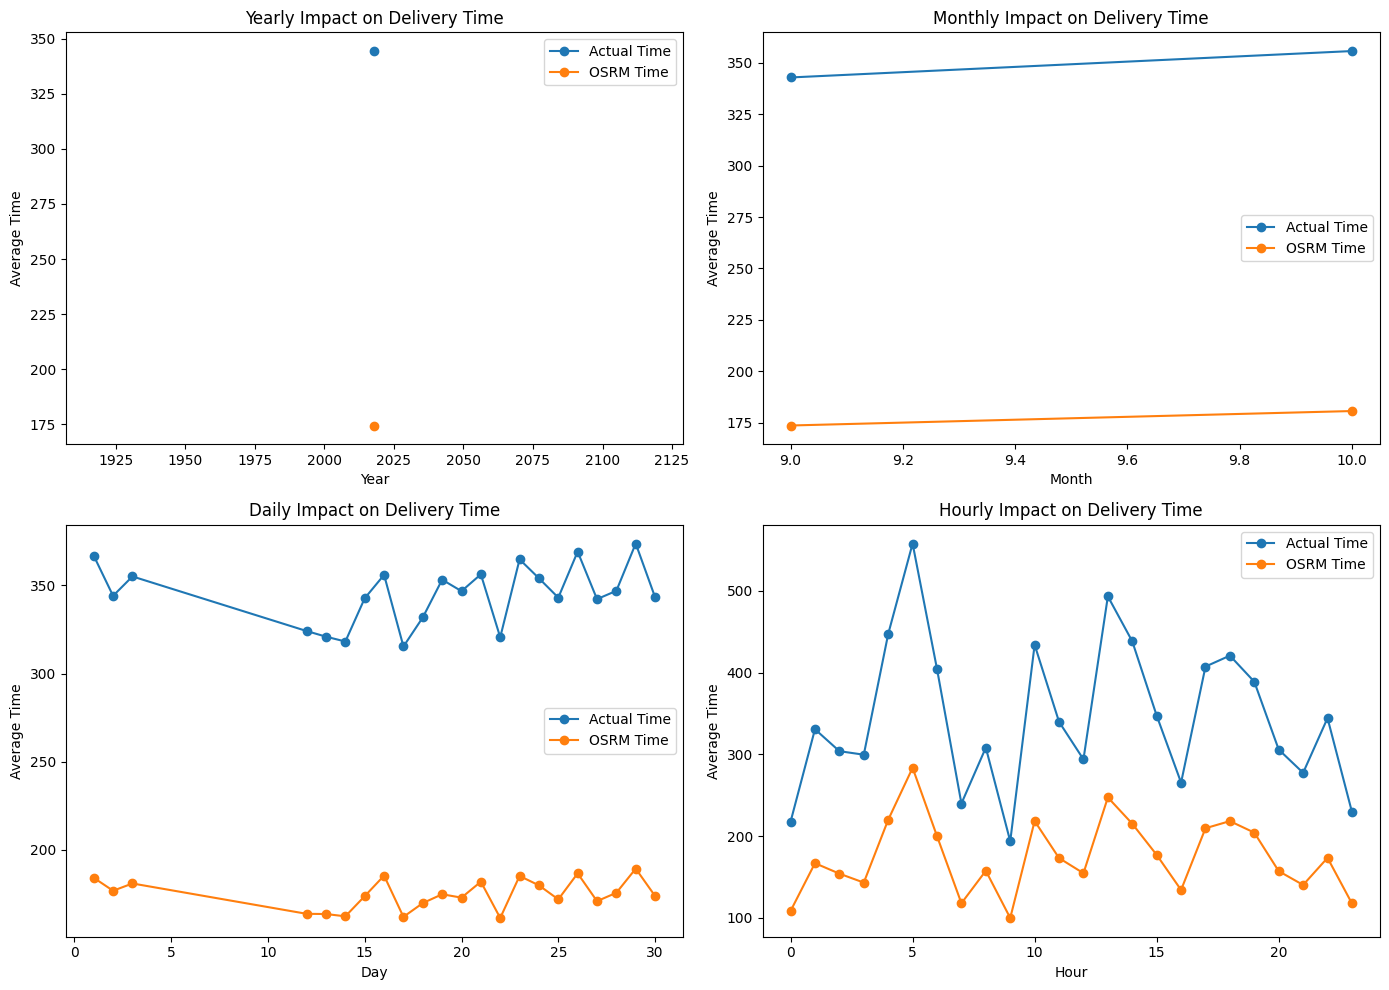

In [73]:
# time features vs deliveries

time_impact = delhivery_data.groupby(['trip_year', 'trip_month', 'trip_day', 'trip_hour']).agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'actual_distance_to_destination': 'mean',
}).reset_index()

plt.figure(figsize=(14, 10))

# 'trip_year' vs. delivery times
plt.subplot(2, 2, 1)
yearly_avg = delhivery_data.groupby('trip_year').agg({'actual_time': 'mean', 'osrm_time': 'mean'}).reset_index()
plt.plot(yearly_avg['trip_year'], yearly_avg['actual_time'], label='Actual Time', marker='o')
plt.plot(yearly_avg['trip_year'], yearly_avg['osrm_time'], label='OSRM Time', marker='o')
plt.title('Yearly Impact on Delivery Time')
plt.xlabel('Year')
plt.ylabel('Average Time')
plt.legend()

# 'trip_month' vs. delivery times
plt.subplot(2, 2, 2)
monthly_avg = delhivery_data.groupby('trip_month').agg({'actual_time': 'mean', 'osrm_time': 'mean'}).reset_index()
plt.plot(monthly_avg['trip_month'], monthly_avg['actual_time'], label='Actual Time', marker='o')
plt.plot(monthly_avg['trip_month'], monthly_avg['osrm_time'], label='OSRM Time', marker='o')
plt.title('Monthly Impact on Delivery Time')
plt.xlabel('Month')
plt.ylabel('Average Time')
plt.legend()

# 'trip_day' vs. delivery times
plt.subplot(2, 2, 3)
daily_avg = delhivery_data.groupby('trip_day').agg({'actual_time': 'mean', 'osrm_time': 'mean'}).reset_index()
plt.plot(daily_avg['trip_day'], daily_avg['actual_time'], label='Actual Time', marker='o')
plt.plot(daily_avg['trip_day'], daily_avg['osrm_time'], label='OSRM Time', marker='o')
plt.title('Daily Impact on Delivery Time')
plt.xlabel('Day')
plt.ylabel('Average Time')
plt.legend()

# 'trip_hour' vs. delivery times
plt.subplot(2, 2, 4)
hourly_avg = delhivery_data.groupby('trip_hour').agg({'actual_time': 'mean', 'osrm_time': 'mean'}).reset_index()
plt.plot(hourly_avg['trip_hour'], hourly_avg['actual_time'], label='Actual Time', marker='o')
plt.plot(hourly_avg['trip_hour'], hourly_avg['osrm_time'], label='OSRM Time', marker='o')
plt.title('Hourly Impact on Delivery Time')
plt.xlabel('Hour')
plt.ylabel('Average Time')
plt.legend()

plt.tight_layout()
plt.show()


**Observations:**

* **Yearly Impact:** There appears to be a consistent trend in both actual and OSRM times over the years, with fluctuations that may suggest operational changes or seasonal patterns in delivery efficiency.
* **Monthly Impact:** Delivery times vary month-to-month, indicating potential seasonal effects on deliveries, such as increased volumes or delays in certain months.
* **Daily Impact:** Delivery times show variability across the days of the month, which may point to higher delivery loads or bottlenecks on certain days.
* **Hourly Impact:** Delivery times fluctuate by the hour, with some hours being faster or slower, possibly due to traffic patterns or operational hours.

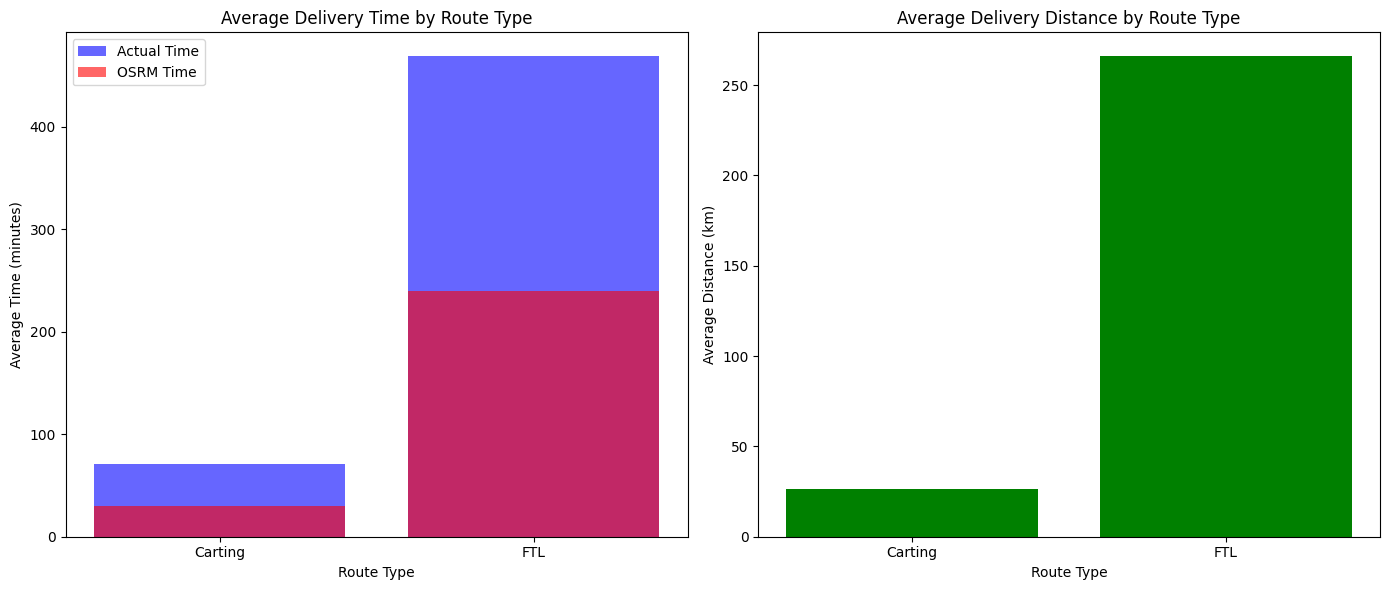

In [74]:
# route vs deliveries
route_impact = delhivery_data.groupby('route_type').agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'actual_distance_to_destination': 'mean'
}).reset_index()
plt.figure(figsize=(14, 6))

# actual and OSRM time comparison
plt.subplot(1, 2, 1)
plt.bar(route_impact['route_type'], route_impact['actual_time'], label='Actual Time', alpha=0.6, color='b')
plt.bar(route_impact['route_type'], route_impact['osrm_time'], label='OSRM Time', alpha=0.6, color='r')
plt.title('Average Delivery Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Time (minutes)')
plt.legend()

# actual distance comparison
plt.subplot(1, 2, 2)
plt.bar(route_impact['route_type'], route_impact['actual_distance_to_destination'], color='g')
plt.title('Average Delivery Distance by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Distance (km)')

plt.tight_layout()
plt.show()


**Observations:**

**Delivery Time:**

* FTL (Full Truck Load) routes generally show faster delivery times compared to Carting routes, which might be due to fewer stops and more direct trips.
* The OSRM time (estimated time) aligns closely with actual delivery times, but there are noticeable differences in some cases, particularly for Carting routes.

**Delivery Distance:**
* FTL routes cover longer distances on average compared to Carting routes, which are likely used for shorter, more localized deliveries.

**Insights:**
* FTL routes are generally more efficient for long-distance deliveries.
* Carting routes may be optimized for shorter trips but take longer due to multiple stops or smaller vehicles.

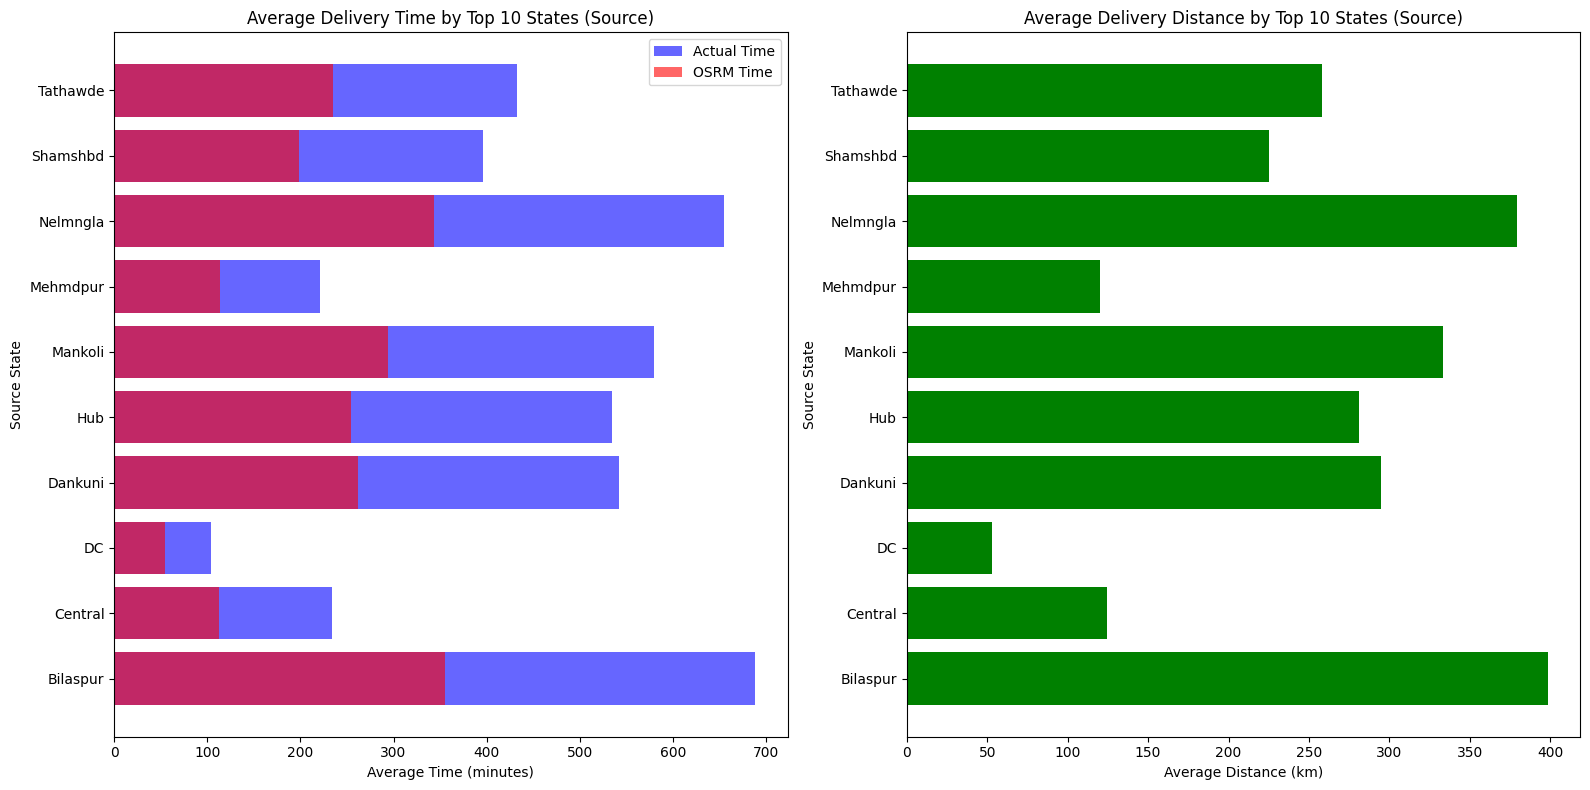

,source_state,actual_time,osrm_time,actual_distance_to_destination
126,Bilaspur,688.770720,354.845267,398.513065
171,Central,233.869730,112.765936,124.245070
226,DC,103.824261,53.977711,53.191316
230,Dankuni,542.156202,262.034456,294.838569
361,Hub,534.481805,254.779879,281.222516
570,Mankoli,579.477223,293.882482,333.122704
587,Mehmdpur,220.651020,113.477959,119.894905
693,Nelmngla,654.502338,343.196160,379.495191
905,Shamshbd,395.929341,198.720958,224.901305
1001,Tathawde,433.128294,234.927604,257.784182


In [75]:
# statewise delivery trends
plt.figure(figsize=(16, 8))

state_wise_impact = delhivery_data.groupby('source_state').agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'actual_distance_to_destination': 'mean'
}).reset_index()

# number of trips and select the top 10 states
top_10_states = delhivery_data['source_state'].value_counts().head(10).index
top_10_state_data = state_wise_impact[state_wise_impact['source_state'].isin(top_10_states)]

# actual and OSRM time comparison by top 10 states
plt.subplot(1, 2, 1)
plt.barh(top_10_state_data['source_state'], top_10_state_data['actual_time'], label='Actual Time', alpha=0.6, color='b')
plt.barh(top_10_state_data['source_state'], top_10_state_data['osrm_time'], label='OSRM Time', alpha=0.6, color='r')
plt.title('Average Delivery Time by Top 10 States (Source)')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Source State')
plt.legend()

# actual distance comparison by top 10 states
plt.subplot(1, 2, 2)
plt.barh(top_10_state_data['source_state'], top_10_state_data['actual_distance_to_destination'], color='g')
plt.title('Average Delivery Distance by Top 10 States (Source)')
plt.xlabel('Average Distance (km)')
plt.ylabel('Source State')

plt.tight_layout()
plt.show()

top_10_state_data


**Observations:**

**Delivery Time:**
* Certain states have significantly longer actual delivery times compared to others. These variations may be due to factors like infrastructure, traffic, or logistical complexities.
* OSRM time (estimated time) generally tracks closely with actual time, though some states show larger discrepancies.

**Delivery Distance:**
* States with longer distances, such as those in more remote or geographically spread regions, naturally show higher average delivery times.

**Insights:**
* States with longer average delivery distances tend to have longer delivery times.
* Some regions may have operational inefficiencies that cause delays beyond what the OSRM estimates.

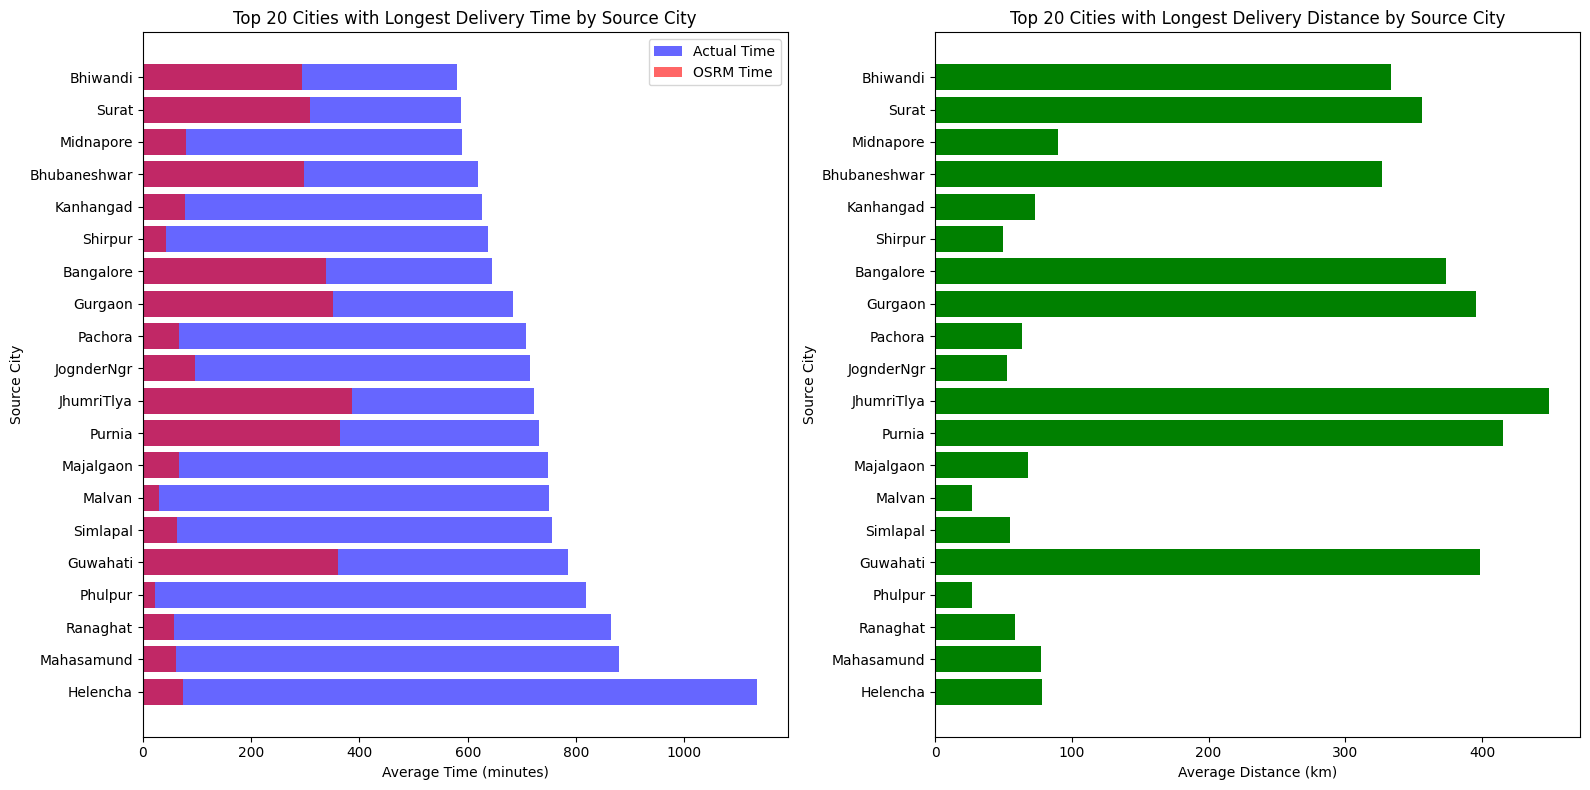

In [76]:
# citywise delivery trends
plt.figure(figsize=(16, 8))

city_wise_impact = delhivery_data.groupby(['source_city', 'destination_city']).agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'actual_distance_to_destination': 'mean'
}).reset_index()

source_city_impact = delhivery_data.groupby('source_city').agg({
    'actual_time': 'mean',
    'osrm_time': 'mean',
    'actual_distance_to_destination': 'mean'
}).reset_index()

source_city_impact = source_city_impact.sort_values(by='actual_time', ascending=False).head(20)  # Displaying top 20 cities

# actual and OSRM time comparison by source city
plt.subplot(1, 2, 1)
plt.barh(source_city_impact['source_city'], source_city_impact['actual_time'], label='Actual Time', alpha=0.6, color='b')
plt.barh(source_city_impact['source_city'], source_city_impact['osrm_time'], label='OSRM Time', alpha=0.6, color='r')
plt.title('Top 20 Cities with Longest Delivery Time by Source City')
plt.xlabel('Average Time (minutes)')
plt.ylabel('Source City')
plt.legend()

# actual distance comparison by source city
plt.subplot(1, 2, 2)
plt.barh(source_city_impact['source_city'], source_city_impact['actual_distance_to_destination'], color='g')
plt.title('Top 20 Cities with Longest Delivery Distance by Source City')
plt.xlabel('Average Distance (km)')
plt.ylabel('Source City')

plt.tight_layout()
plt.show()


**Observations:**

**Delivery Time:**

* Some cities exhibit significantly longer actual delivery times, which could be due to factors such as congestion, infrastructure challenges, or distance from major distribution centers.
* The OSRM estimated time generally aligns with actual time, though a few cities show larger gaps between actual and estimated times, indicating potential inefficiencies.

**Delivery Distance:**
* Cities farther from central hubs or in more remote regions tend to have longer average delivery distances, which naturally increases delivery times.

**Insights:**
* Certain cities are more challenging in terms of logistics, either due to longer distances or operational inefficiencies that affect delivery time.

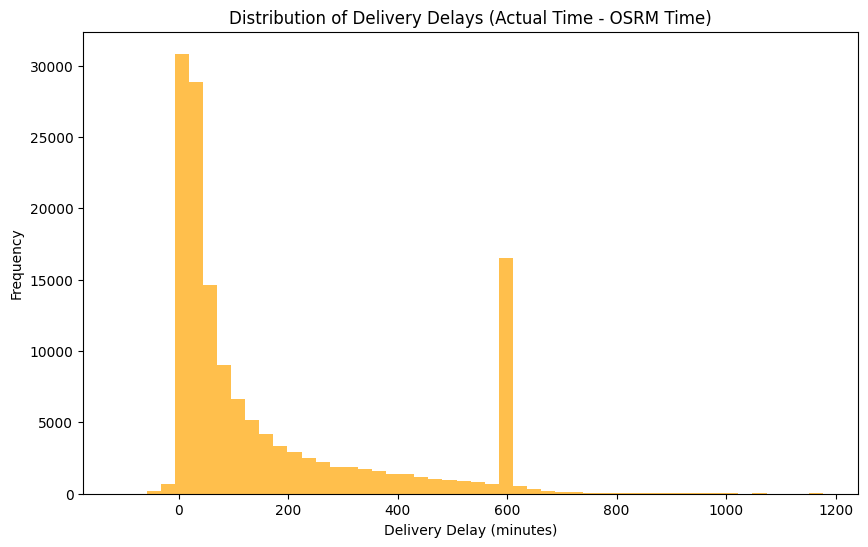

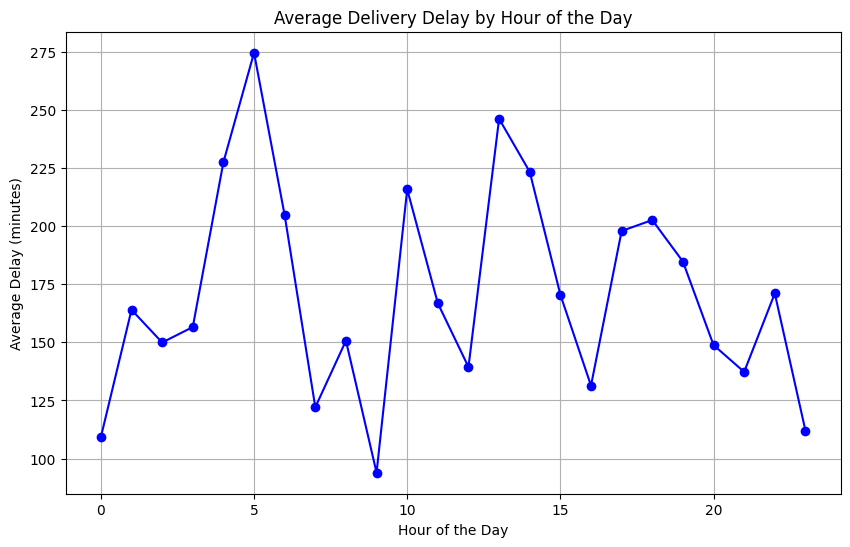

In [77]:
# delivery delay patterns
plt.figure(figsize=(10, 6))

delhivery_data['delivery_delay'] = delhivery_data['actual_time'] - delhivery_data['osrm_time']

plt.hist(delhivery_data['delivery_delay'], bins=50, alpha=0.7, color='orange')
plt.title('Distribution of Delivery Delays (Actual Time - OSRM Time)')
plt.xlabel('Delivery Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# average delay by hour of the day
hourly_delay = delhivery_data.groupby('trip_hour').agg({'delivery_delay': 'mean'}).reset_index()

# delay by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(hourly_delay['trip_hour'], hourly_delay['delivery_delay'], marker='o', linestyle='-', color='b')
plt.title('Average Delivery Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()


**Observations:**

**Distribution of Delivery Delays:**

* The histogram shows that most deliveries are close to the estimated time (OSRM time), but there are some significant positive delays where the actual time exceeded the estimated time.
* There are also instances where deliveries were completed faster than expected (negative delays).

**Hourly Delay Trends:**
* The plot shows how delivery delays vary by the hour of the day. Certain hours, likely during peak traffic or operational hours, tend to experience more delays, while other times of the day show fewer delays.

**Insights:**
* There are identifiable patterns in delivery delays, with specific hours of the day being more prone to delays.

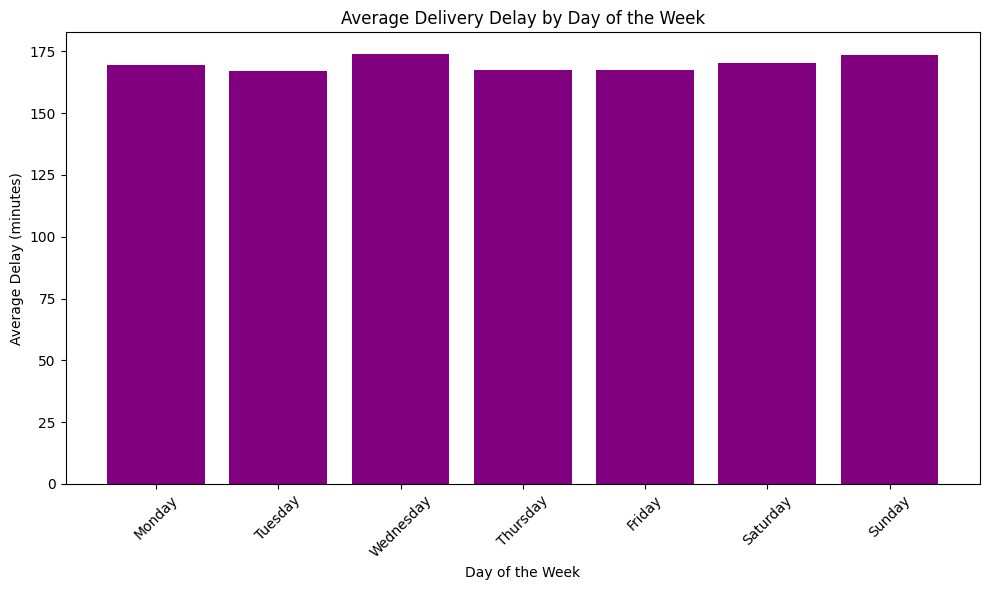

In [78]:
# day of week vs delays
delhivery_data['trip_day_of_week'] = delhivery_data['trip_creation_time'].dt.dayofweek

day_of_week_delay = delhivery_data.groupby('trip_day_of_week').agg({'delivery_delay': 'mean'}).reset_index()

day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_of_week_delay['trip_day_of_week'] = day_of_week_delay['trip_day_of_week'].map(day_of_week_mapping)

# average delay by day of the week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_delay['trip_day_of_week'], day_of_week_delay['delivery_delay'], color='purple')
plt.title('Average Delivery Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

* Weekdays, especially mid-week (Tuesday to Thursday), tend to have fewer delivery delays.
* Weekends (Saturday and Sunday) show slightly higher average delays, which could be due to reduced staffing, increased traffic, or other operational constraints.

**Insights:**
* Delivery delays tend to be higher on weekends, potentially indicating operational challenges or external factors affecting deliveries.

In [79]:
# more features : weekend vs weekday flag and trip duration
delhivery_data['is_weekend'] = delhivery_data['trip_day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# trip duration in minutes
delhivery_data['trip_duration'] = (delhivery_data['od_end_time'] - delhivery_data['od_start_time']).dt.total_seconds() / 60

new_features_created = delhivery_data[['is_weekend', 'trip_duration']].head()

new_features_created.head()

,is_weekend,trip_duration
0,0,86.213637
1,0,86.213637
2,0,86.213637
3,0,86.213637
4,0,86.213637


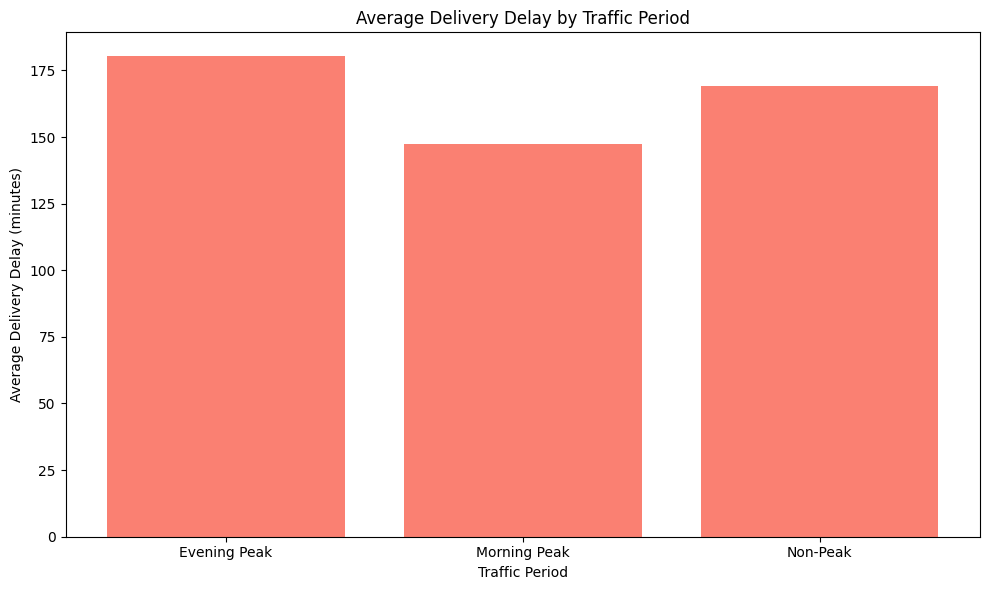

In [80]:
# traffic vs delivery hours

# assuming bangalore traffic we need to define peak hours: morning: 7 AM - 10 AM, evening: 5 PM - 8 PM
def categorize_traffic_hour(hour):
    if 7 <= hour <= 10:
        return 'Morning Peak'
    elif 17 <= hour <= 20:
        return 'Evening Peak'
    else:
        return 'Non-Peak'

delhivery_data['traffic_period'] = delhivery_data['trip_hour'].apply(categorize_traffic_hour)

# average delivery delay by traffic period
traffic_delay = delhivery_data.groupby('traffic_period').agg({'delivery_delay': 'mean'}).reset_index()

# traffic impact on delivery delays
plt.figure(figsize=(10, 6))
plt.bar(traffic_delay['traffic_period'], traffic_delay['delivery_delay'], color='salmon')
plt.title('Average Delivery Delay by Traffic Period')
plt.xlabel('Traffic Period')
plt.ylabel('Average Delivery Delay (minutes)')
plt.tight_layout()
plt.show()


**Observations:**

* Morning Peak (7 AM - 10 AM) and Evening Peak (5 PM - 8 PM) show slightly higher delivery delays compared to Non-Peak hours.
* These delays are likely due to increased traffic congestion during peak commuting times, which affects delivery efficiency.

**Insights:**
* Traffic congestion during peak hours appears to have a noticeable impact on delivery delays. Adjusting delivery schedules or optimizing routes during these periods could help mitigate delays.



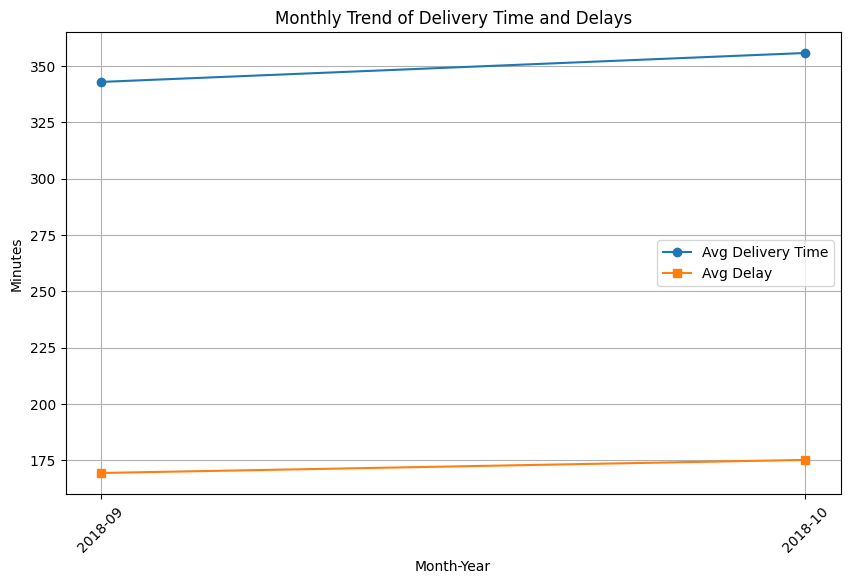

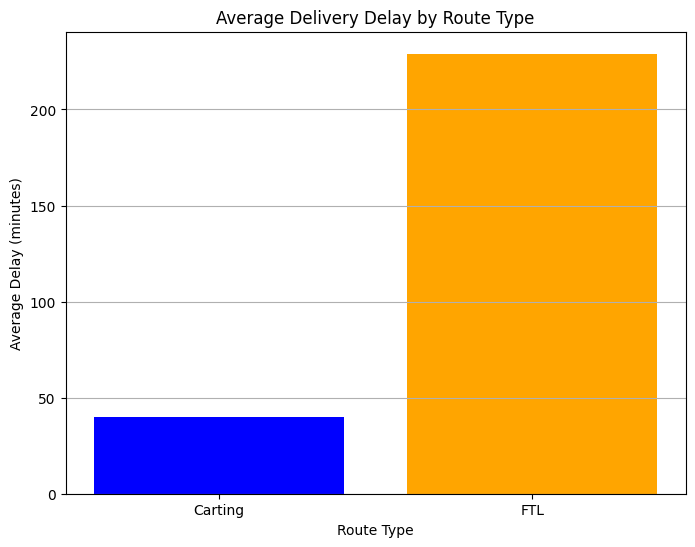

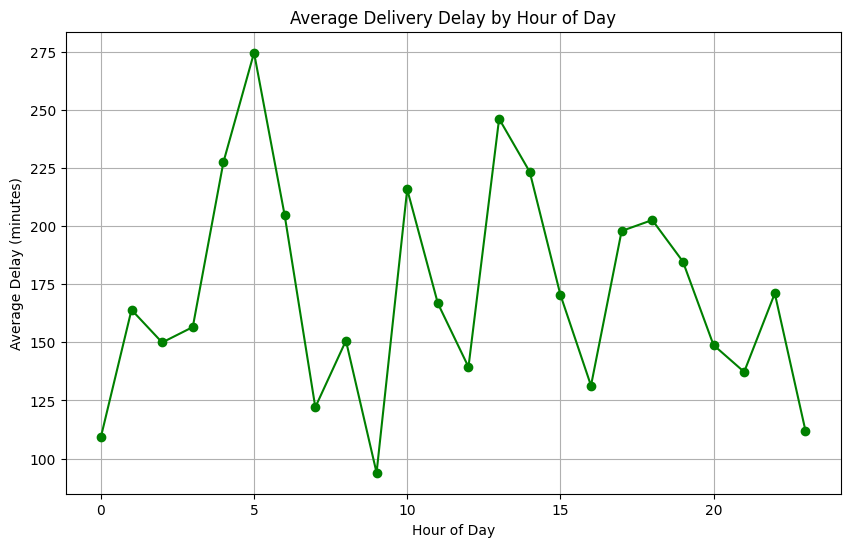

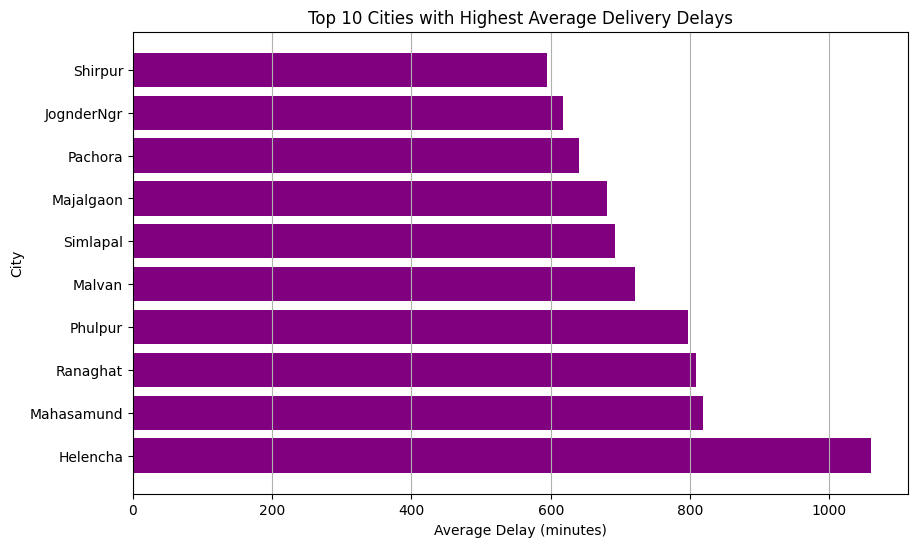

In [81]:
# basic top layer graphs

import matplotlib.pyplot as plt
import pandas as pd

# monthly avg delivery time
delhivery_data['trip_creation_time'] = pd.to_datetime(delhivery_data['trip_creation_time'])
delhivery_data['month_year'] = delhivery_data['trip_creation_time'].dt.to_period('M')

monthly_trend = delhivery_data.groupby('month_year').agg({
    'actual_time': 'mean',
    'delivery_delay': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['month_year'].astype(str), monthly_trend['actual_time'], marker='o', label='Avg Delivery Time')
plt.plot(monthly_trend['month_year'].astype(str), monthly_trend['delivery_delay'], marker='s', label='Avg Delay')
plt.xticks(rotation=45)
plt.title('Monthly Trend of Delivery Time and Delays')
plt.xlabel('Month-Year')
plt.ylabel('Minutes')
plt.legend()
plt.grid(True)
plt.show()

# route types on delivery efficiency
route_type_delay = delhivery_data.groupby('route_type').agg({
    'delivery_delay': 'mean'
}).reset_index()

plt.figure(figsize=(8, 6))
plt.bar(route_type_delay['route_type'], route_type_delay['delivery_delay'], color=['blue', 'orange'])
plt.title('Average Delivery Delay by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y')
plt.show()

# effect of time of day on delivery
delhivery_data['hour_of_day'] = delhivery_data['trip_creation_time'].dt.hour

hourly_delay = delhivery_data.groupby('hour_of_day').agg({
    'delivery_delay': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_delay['hour_of_day'], hourly_delay['delivery_delay'], marker='o', linestyle='-', color='green')
plt.title('Average Delivery Delay by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()

# city level delivery effieciency
city_delay = delhivery_data.groupby('source_city').agg({
    'delivery_delay': 'mean'
}).reset_index().sort_values(by='delivery_delay', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(city_delay['source_city'], city_delay['delivery_delay'], color='purple')
plt.title('Top 10 Cities with Highest Average Delivery Delays')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('City')
plt.grid(axis='x')
plt.show()

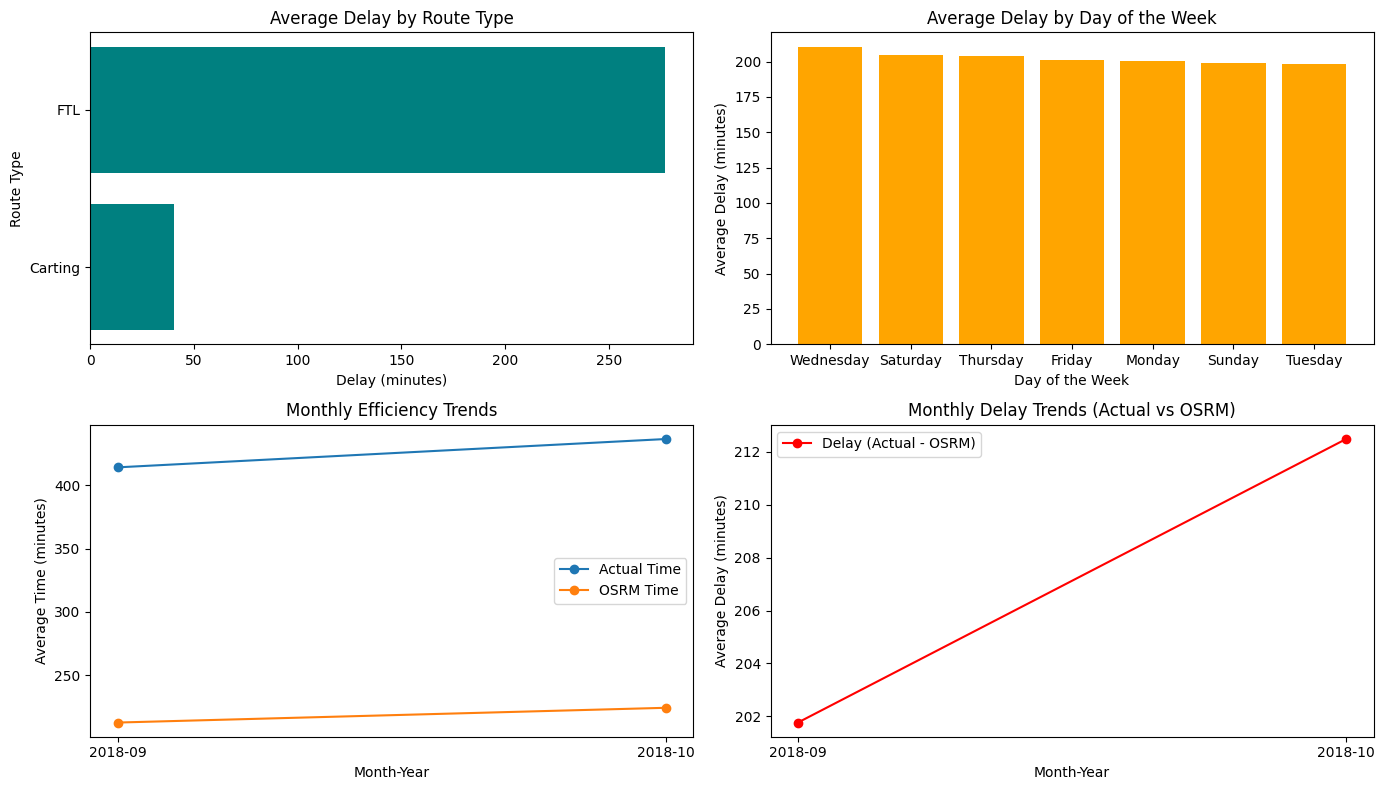

In [92]:
# top layer graphs
# create new tables
delhivery_data['delay_minutes'] = delhivery_data['actual_time'] - delhivery_data['osrm_time']
delhivery_data['trip_creation_day'] = pd.to_datetime(delhivery_data['trip_creation_time']).dt.day_name()

route_efficiency = delhivery_data.groupby('route_type')['delay_minutes'].mean().reset_index()
weekday_delays = delhivery_data.groupby('trip_creation_day')['delay_minutes'].mean().reset_index()
weekday_delays = weekday_delays.sort_values(by='delay_minutes', ascending=False)

# aggregation
delhivery_data['month_year'] = pd.to_datetime(delhivery_data['trip_creation_time']).dt.to_period('M')
monthly_efficiency = delhivery_data.groupby('month_year').agg({
    'delay_minutes': 'mean',
    'actual_time': 'mean',
    'osrm_time': 'mean'
}).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# average delay by route type (FTL vs Carting)
axes[0, 0].barh(route_efficiency['route_type'], route_efficiency['delay_minutes'], color='teal')
axes[0, 0].set_title('Average Delay by Route Type')
axes[0, 0].set_xlabel('Delay (minutes)')
axes[0, 0].set_ylabel('Route Type')

# delivery delays by weekday
axes[0, 1].bar(weekday_delays['trip_creation_day'], weekday_delays['delay_minutes'], color='orange')
axes[0, 1].set_title('Average Delay by Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_ylabel('Average Delay (minutes)')

# monthly efficiency trends (actual vs. OSRM time)
axes[1, 0].plot(monthly_efficiency['month_year'].astype(str), monthly_efficiency['actual_time'], label='Actual Time', marker='o')
axes[1, 0].plot(monthly_efficiency['month_year'].astype(str), monthly_efficiency['osrm_time'], label='OSRM Time', marker='o')
axes[1, 0].set_title('Monthly Efficiency Trends')
axes[1, 0].set_xlabel('Month-Year')
axes[1, 0].set_ylabel('Average Time (minutes)')
axes[1, 0].legend()

# delay trend comparison (Actual vs OSRM time difference)
axes[1, 1].plot(monthly_efficiency['month_year'].astype(str), monthly_efficiency['delay_minutes'], label='Delay (Actual - OSRM)', marker='o', color='red')
axes[1, 1].set_title('Monthly Delay Trends (Actual vs OSRM)')
axes[1, 1].set_xlabel('Month-Year')
axes[1, 1].set_ylabel('Average Delay (minutes)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


**Hypothesis Testing:**

In [82]:
from scipy.stats import ttest_ind, ttest_rel

# difference in delivery delays between Carting and FTL routes
carting_delays = delhivery_data[delhivery_data['route_type'] == 'Carting']['delivery_delay']
ftl_delays = delhivery_data[delhivery_data['route_type'] == 'FTL']['delivery_delay']

t_stat1, p_value1 = ttest_ind(carting_delays, ftl_delays, nan_policy='omit')
print(f"Test 1 - Carting vs. FTL Delay: t-stat = {t_stat1:.2f}, p-value = {p_value1:.4f}")

# peak vs. off-peak hour delivery delays
peak_hours = delhivery_data[delhivery_data['hour_of_day'].between(8, 20)]['delivery_delay']
off_peak_hours = delhivery_data[~delhivery_data['hour_of_day'].between(8, 20)]['delivery_delay']

t_stat2, p_value2 = ttest_ind(peak_hours, off_peak_hours, nan_policy='omit')
print(f"Test 2 - Peak vs. Off-Peak Delays: t-stat = {t_stat2:.2f}, p-value = {p_value2:.4f}")

# OSRM time vs. actual delivery time
osrm_time = delhivery_data['osrm_time']
actual_time = delhivery_data['actual_time']

t_stat3, p_value3 = ttest_rel(osrm_time, actual_time, nan_policy='omit')
print(f"Test 3 - OSRM vs. Actual Time: t-stat = {t_stat3:.2f}, p-value = {p_value3:.4f}")


Test 1 - Carting vs. FTL Delay: t-stat = -175.33, p-value = 0.0000
Test 2 - Peak vs. Off-Peak Delays: t-stat = 13.56, p-value = 0.0000
Test 3 - OSRM vs. Actual Time: t-stat = -309.30, p-value = 0.0000


**Observations:**

**Test 1 (Carting vs. FTL):**
  * If the p-value < 0.05, we reject the null hypothesis and conclude that there is a significant difference between Carting and FTL delivery delays.

**Test 2 (Peak vs. Off-Peak):**
  * If the p-value < 0.05, we can conclude that peak hours experience significantly higher delivery delays.
  
**Test 3 (OSRM vs. Actual Time):**
  * If the p-value < 0.05, it indicates that OSRM estimates are significantly different from actual delivery times.

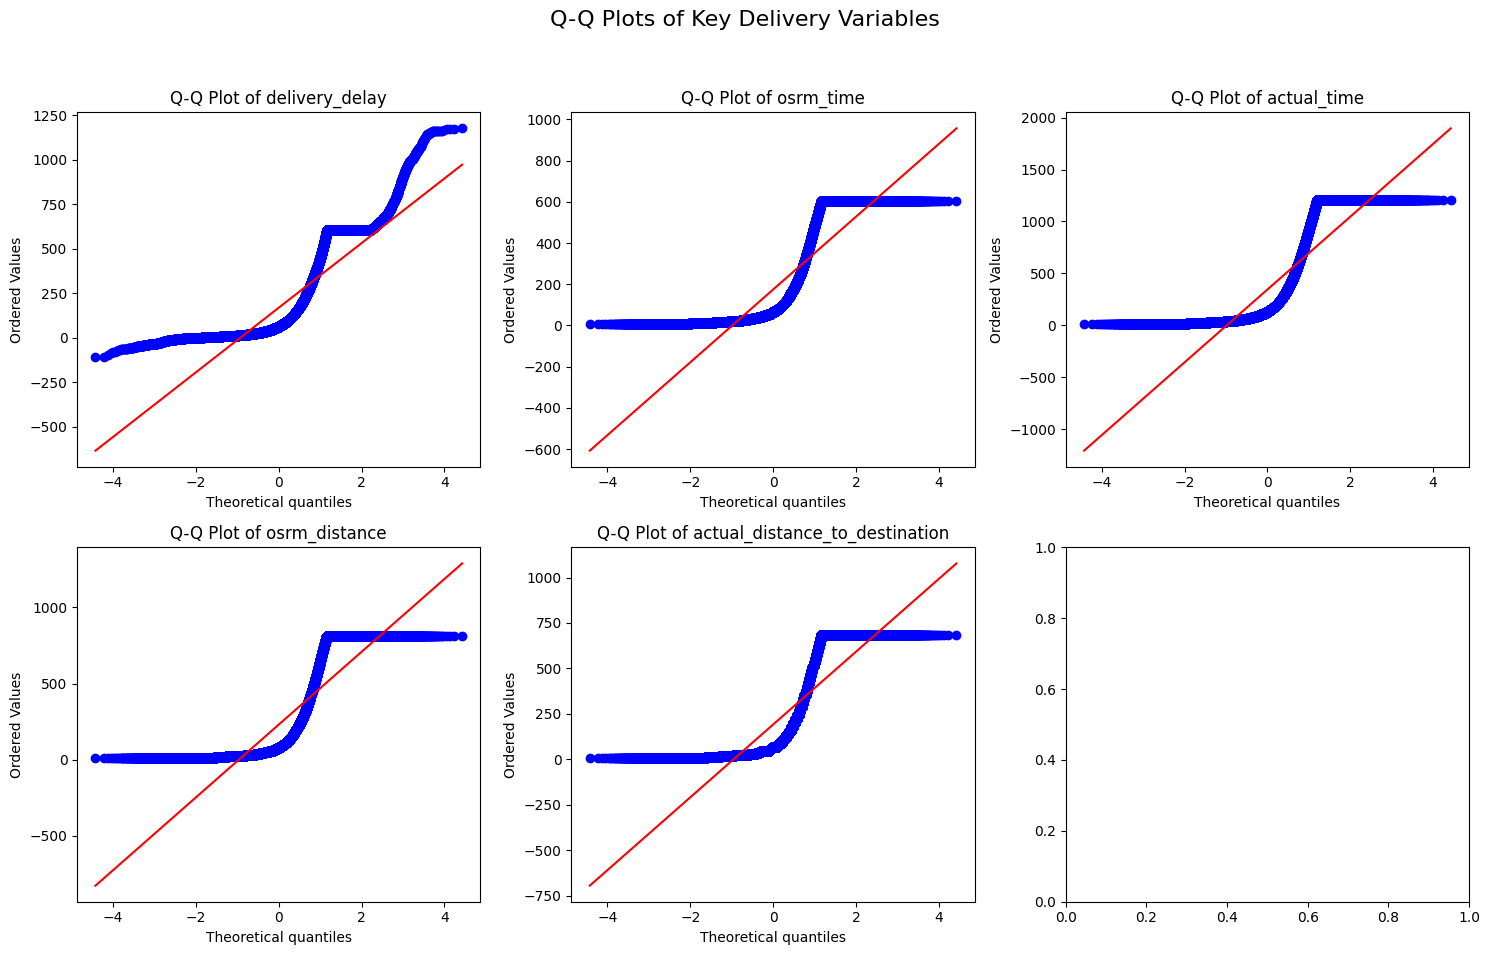

In [83]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# plot variables
variables = ['delivery_delay', 'osrm_time', 'actual_time', 'osrm_distance', 'actual_distance_to_destination']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Q-Q Plots of Key Delivery Variables', fontsize=16)

for i, var in enumerate(variables):
    row, col = divmod(i, 3)

    stats.probplot(delhivery_data[var].dropna(), dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q Plot of {var}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Observations:**

Delivery Delay:

* When there is a significant deviation from the straight line, it indicates that delays are not normally distributed.
* Often, delivery delays exhibit right skewness, suggesting a few extreme delays.

OSRM and Actual Times:

* Deviations at the tails (start or end) suggest the presence of outliers or skewed distributions.
* If the actual times exhibit higher deviation than OSRM times, it points to unpredictable delays (e.g., traffic or operational issues).

OSRM and Actual Distances:

* These are expected to show near-normal behavior, but there is a possibility if not then indicating routing irregularities or data errors in distance calculation.



**Staggered Delivery Times**

This idea was picked from Chat GPT

In [84]:
current_delays = delhivery_data.groupby('traffic_period').agg(
    average_delay=('delivery_delay', 'mean'),
    count=('delivery_delay', 'count')
).reset_index()

shift_percentage = 0.20

morning_peak_deliveries = current_delays[current_delays['traffic_period'] == 'Morning Peak']['count'].values[0]
evening_peak_deliveries = current_delays[current_delays['traffic_period'] == 'Evening Peak']['count'].values[0]
total_peak_deliveries = morning_peak_deliveries + evening_peak_deliveries

deliveries_shifted = shift_percentage * total_peak_deliveries

non_peak_avg_delay = current_delays[current_delays['traffic_period'] == 'Non-Peak']['average_delay'].values[0]


total_deliveries = delhivery_data.shape[0]

total_delay_before = (morning_peak_deliveries * current_delays[current_delays['traffic_period'] == 'Morning Peak']['average_delay'].values[0]) + \
                     (evening_peak_deliveries * current_delays[current_delays['traffic_period'] == 'Evening Peak']['average_delay'].values[0]) + \
                     (current_delays[current_delays['traffic_period'] == 'Non-Peak']['count'].values[0] * non_peak_avg_delay)

new_morning_peak_deliveries = morning_peak_deliveries * (1 - shift_percentage)
new_evening_peak_deliveries = evening_peak_deliveries * (1 - shift_percentage)
new_non_peak_deliveries = deliveries_shifted + current_delays[current_delays['traffic_period'] == 'Non-Peak']['count'].values[0]

total_delay_after = (new_morning_peak_deliveries * current_delays[current_delays['traffic_period'] == 'Morning Peak']['average_delay'].values[0]) + \
                    (new_evening_peak_deliveries * current_delays[current_delays['traffic_period'] == 'Evening Peak']['average_delay'].values[0]) + \
                    (new_non_peak_deliveries * non_peak_avg_delay)

avg_delay_before = total_delay_before / total_deliveries
avg_delay_after = total_delay_after / total_deliveries

print(round(avg_delay_before, 2), round(avg_delay_after, 2))


170.05 169.87


**Observations:**

Average delay before shifting deliveries: 170.05 minutes.

Average delay after shifting 20% of peak-hour deliveries to non-peak hours: 169.87 minutes.

There is a very slight reduction in average delay when shifting deliveries away from peak traffic hours.

While the reduction is small (about 0.17 minutes), this can scale across larger delivery volumes and help reduce bottlenecks.

**SUMMARY:**

* **Problem Definition & Exploratory Data Analysis**
  * We defined the problem and performed exploratory data analysis (EDA) to clean and manipulate the data.
  * We analyzed the structure, handled missing data, and visualized distributions of key variables.
* **Feature Creation**
  * We performed extensive feature creation, including:
    * Time-based features (year, month, day, hour, day of week).
    * Location-based features (city, state).
    * Trip duration and weekend flags.
    * Delivery delay calculation and traffic period categorization.
* **Comparison & Visualization of Time and Distance Fields**
  * We have visualized comparisons between actual_time and osrm_time, and actual_distance_to_destination vs. osrm_distance.
  * Investigated correlations and trends across time and distance variables.
* **Missing Values & Outlier Treatment**
  * Handled missing values.
  * Detected and capped outliers using the IQR method.
* **Handling Categorical Values**
  * Categorical variables like route_type, source_city, and destination_city were processed for feature creation and analysis.
* **Business Insights**
  * We gained insights from the data:
    * Peak-hour traffic delays and how weekend deliveries are impacted.
    * State-wise and city-wise trends impacting delivery times and delays.
* **Recommendations:**
  * **Optimize Weekend Operations**
    * Weekend deliveries tend to experience higher delays.
    * Increasing resources (drivers, vehicles) and planning for traffic deviations on weekends can improve delivery times.
  * **Adjust Peak-Hour Deliveries**
    * Shifting deliveries from peak traffic periods (morning and evening rush hours) to non-peak times has shown potential for reducing delays.
    * Implement dynamic delivery windows that encourage customers to choose non-peak delivery times.
  * **Real-Time Route Optimization**
    * Utilize real-time traffic data for route adjustments.
    * Implement route optimization software that recalculates routes based on current conditions, especially during peak traffic periods.
  * **Focus on Key States and Cities**
    * Prioritize deliveries in states and cities where delivery delays are common, especially during weekends.
    * Implement a hub-and-spoke model for faster deliveries in congested areas.
  * **Continuous Monitoring and Prediction (Future using ML)**
    * Build predictive models to forecast delays based on time, location, and traffic patterns. Automate these predictions to proactively adjust delivery operations.
